# **Stage 1 - Understanding the Dataset**

* Dataset yang digunakan merupakan data perusahaan asuransi yaitu asuransi kendaraan
* Dataset memiliki 381109 observasi
* Penjelasan per kolom :
![Screenshot%202021-11-27%20093326.png](attachment:Screenshot%202021-11-27%20093326.png)

# **Stage 2 - Identify Which Activities Should Be Done**
* Melakukan EDA dan Data Visualisasi
* Melakukan Pre-Proses Data
* Membuat Model dan Evaluasi Model

# **Stage 3 - Exploratory Data Analysis and Data Visualization**

## Import Libraries

In [ ]:
#Data
import pandas as pd
import numpy as np

#Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#Label Encoder
from sklearn import preprocessing

#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Metriks Evaluasi
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#Split data
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

#Grid Search
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [ ]:
df = pd.read_csv('Dataset_3 - Insurance.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


* Terdapat 7 variabel kategorikal yaitu Gender, Diring_License, Region_Code, Previously_Insured, Vehicle_Age,Vehicle_Damage, dan Response
* Terdapat 5 variabel numerikal yaitu id, Age, Annual_Premium, Policy_Sales_Channel, dan Vintage
* Variabel Response merupakan variabel target

## Info Dataset

In [ ]:
df.shape

(381109, 12)

In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#Mencari missing value
total_missing = df.isnull().sum()
missing_1 = total_missing / (df.isnull().count() * 100)
missing_1 = round(missing_1, 1)
missing_df = pd.concat([total_missing, missing_1], axis=1, keys=['Total Missing', 'Percentage'])
missing_df

,Total Missing,Percentage
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0


<Figure size 864x576 with 0 Axes>

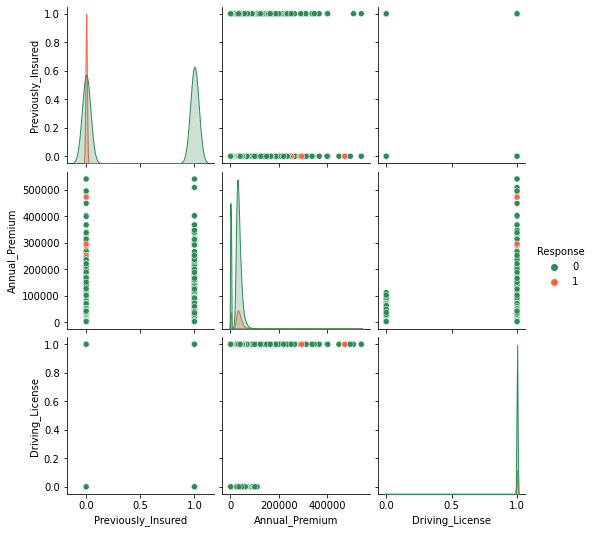

In [ ]:
#Visualisasi data dari data yang dianggap sebagai fitur penting
numerical_var = ['Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age', 'Annual_Premium', 'Driving_License', 'Response']
colors = ['seagreen', 'tomato']

plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_var], kind='scatter', hue='Response', palette=colors)
plt.show()

## Frekuensi Data

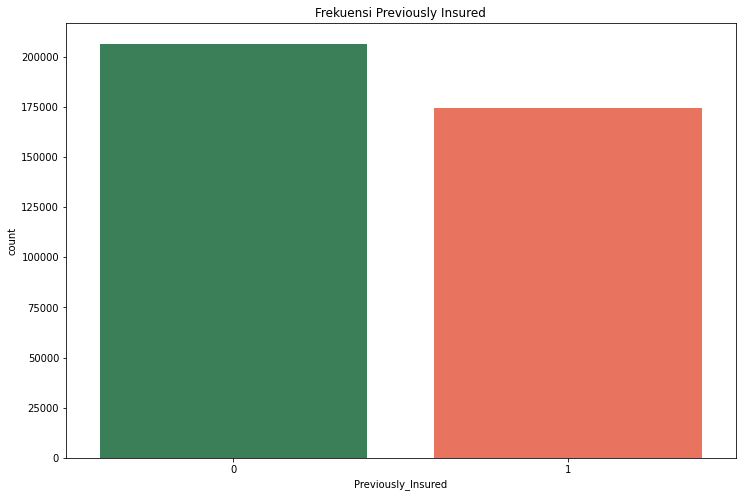

In [ ]:
#Frekuensi Previously_Insured
plt.figure(figsize=(12, 8))

prev_ins = sns.countplot(x='Previously_Insured', data=df, palette=colors, linewidth=2)
prev_ins.set_title('Frekuensi Previously Insured')
plt.show()

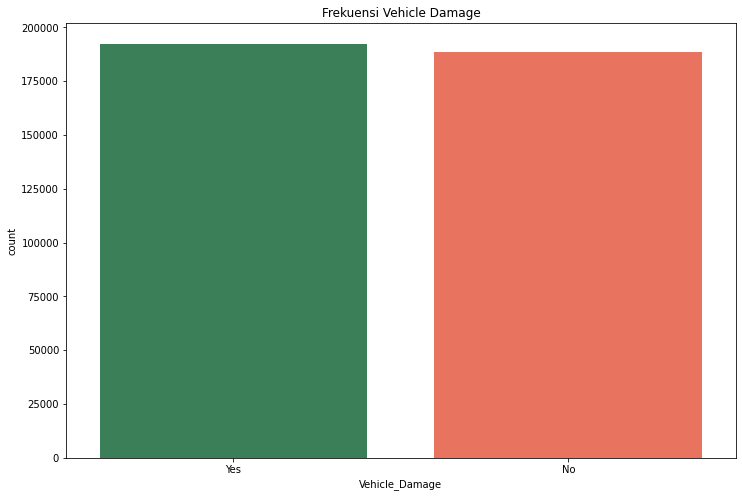

In [ ]:
#Frekuensi Vehicle_Damage
plt.figure(figsize=(12, 8))

ve_damage = sns.countplot(x='Vehicle_Damage', data=df, palette=colors, linewidth=2)
ve_damage.set_title('Frekuensi Vehicle Damage')
plt.show()

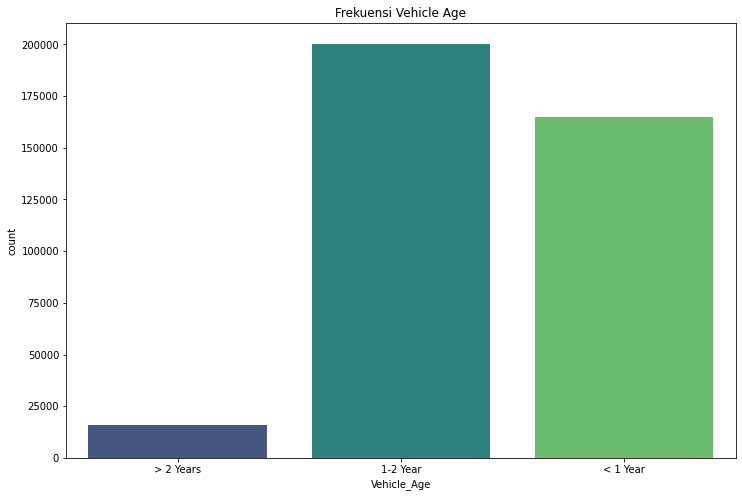

In [ ]:
#Frekuensi Vehicle Age
plt.figure(figsize=(12, 8))

prev_ins = sns.countplot(x='Vehicle_Age', data=df, palette='viridis', linewidth=2)
prev_ins.set_title('Frekuensi Vehicle Age')
plt.show()

# **Stage 4 - Data Preprocessing**

## One Hot Encoding

In [ ]:
#untuk data categorial yang nominal
#Gender
df = pd.get_dummies(df, columns=['Gender'])

In [ ]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,1
1,2,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1
2,3,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,1
3,4,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1
4,5,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,0,1
381105,381106,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0,1
381106,381107,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0,1
381107,381108,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1,0


## Label Encoder

In [ ]:
#untuk data kategorialyang ordinal

label_encoder = preprocessing.LabelEncoder()

#Vehicle_Age
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])

#Vehicle Damage
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,0,1
1,2,76,1,3.0,0,0,0,33536.0,26.0,183,0,0,1
2,3,47,1,28.0,0,2,1,38294.0,26.0,27,1,0,1
3,4,21,1,11.0,1,1,0,28619.0,152.0,203,0,0,1
4,5,29,1,41.0,1,1,0,27496.0,152.0,39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,0,0,30170.0,26.0,88,0,0,1
381105,381106,30,1,37.0,1,1,0,40016.0,152.0,131,0,0,1
381106,381107,21,1,30.0,1,1,0,35118.0,160.0,161,0,0,1
381107,381108,68,1,14.0,0,2,1,44617.0,124.0,74,0,1,0


Untuk Vehicle Age
* 0 = 1-2 Years
* 1 = <1 Years
* 2 = >2 Years

## Korelasi dari semua kolom

<AxesSubplot:>

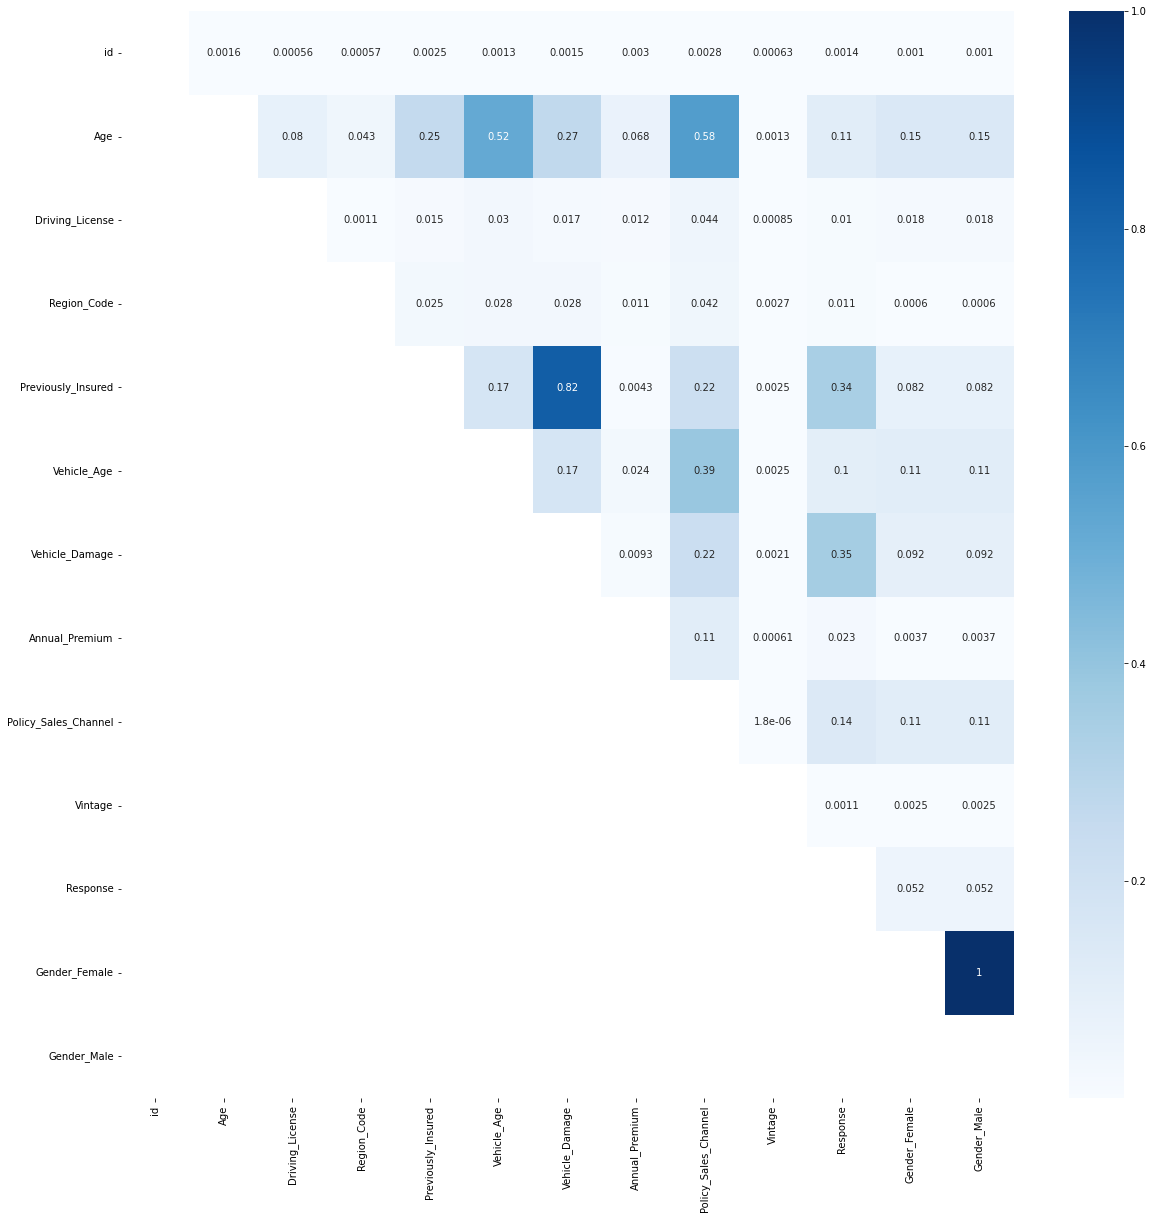

In [ ]:
corr = df.corr().abs()

#ambil bagian segitiga atas dari correlation matrix
atas = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

plt.figure(figsize=(20, 20))
sns.heatmap(atas, annot=True, cmap='Blues')

In [ ]:
#Hapus Vehicle_Damage karena korelasi yang tinggi dengan Previously_Insured. 
#Data keduanya pun terdiri dari 0 dan 1 yang akan membuat model tidak bekerja dengan baik.
df.drop(['Vehicle_Damage'], axis=1, inplace=True)

In [ ]:
#Mengganti keseluruhan data ke bentuk float agar lebih detail
df = df.astype(float)
print(df.dtypes)

id                      float64
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age             float64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                float64
Gender_Female           float64
Gender_Male             float64
dtype: object


In [ ]:
#Memisahkan data target dan data feature
#x adalah data feature
#y adalah data target
y= df['Response']
X= df.drop(['Response'], axis=1)

In [ ]:
X

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male
0,1.0,44.0,1.0,28.0,0.0,2.0,40454.0,26.0,217.0,0.0,1.0
1,2.0,76.0,1.0,3.0,0.0,0.0,33536.0,26.0,183.0,0.0,1.0
2,3.0,47.0,1.0,28.0,0.0,2.0,38294.0,26.0,27.0,0.0,1.0
3,4.0,21.0,1.0,11.0,1.0,1.0,28619.0,152.0,203.0,0.0,1.0
4,5.0,29.0,1.0,41.0,1.0,1.0,27496.0,152.0,39.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,1.0,26.0,1.0,0.0,30170.0,26.0,88.0,0.0,1.0
381105,381106.0,30.0,1.0,37.0,1.0,1.0,40016.0,152.0,131.0,0.0,1.0
381106,381107.0,21.0,1.0,30.0,1.0,1.0,35118.0,160.0,161.0,0.0,1.0
381107,381108.0,68.0,1.0,14.0,0.0,2.0,44617.0,124.0,74.0,1.0,0.0


In [ ]:
y

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
381104    0.0
381105    0.0
381106    0.0
381107    0.0
381108    0.0
Name: Response, Length: 381109, dtype: float64

# **Stage 5 - Build Model with Machine Learning**

## Model Selection

In [ ]:
#Stratified K-Fold
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        nfold += 1
    
    print("----------Hasil Akhir per Algoritma------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------Hasil Akhir per Algoritma------------
DecisionTreeClassifier Acc Train: 1.0
DecisionTreeClassifier Acc Test: 0.8193508934729093
DecisionTreeClassifier Recall: 0.2953329051594948
DecisionTreeClassifier Precission: 0.2774115480352342
DecisionTreeClassifier AUC: 0.5939402158778543
---------------------------


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------Hasil Akhir per Algoritma------------
LogisticRegression Acc Train: 0.877436638861426
LogisticRegression Acc Test: 0.8774366388601603
LogisticRegression Recall: 0.0
LogisticRegression Precission: 0.0
LogisticRegression AUC: 0.5
---------------------------


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu

----------Hasil Akhir per Algoritma------------
KNeighborsClassifier Acc Train: 0.8811376794336311
KNeighborsClassifier Acc Test: 0.8657444448352036
KNeighborsClassifier Recall: 0.016720188396488974
KNeighborsClassifier Precission: 0.12952871132974528
KNeighborsClassifier AUC: 0.500529627330465
---------------------------
----------Hasil Akhir per Algoritma------------
GaussianNB Acc Train: 0.8762361949714039
GaussianNB Acc Test: 0.8762060206177135
GaussianNB Recall: 0.00415328623421109
GaussianNB Precission: 0.23055800438619764
GaussianNB AUC: 0.5010853129379481
---------------------------
----------Hasil Akhir per Algoritma------------
RandomForestClassifier Acc Train: 0.9999895043184809
RandomForestClassifier Acc Test: 0.8725299065674487
RandomForestClassifier Recall: 0.06127167630057803
RandomForestClassifier Precission: 0.3770025594223237
RandomForestClassifier AUC: 0.5235604584709347
---------------------------
----------Hasil Akhir per Algoritma------------
GradientBoostingClass

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----------Hasil Akhir per Algoritma------------
XGBClassifier Acc Train: 0.8813948237031406
XGBClassifier Acc Test: 0.8767386755485815
XGBClassifier Recall: 0.019653179190751446
XGBClassifier Precission: 0.4370935332149232
XGBClassifier AUC: 0.508056249068983
---------------------------


## Membandingkan setiap model

In [ ]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
1,LogisticRegression,0.877437,0.877437,0.000000,0.000000,0.500000,1.265654e-12
5,GradientBoostingClassifier,0.877513,0.877376,0.271053,0.000278,0.500085,1.364438e-04
7,XGBClassifier,0.881395,0.876739,0.437094,0.019653,0.508056,4.656148e-03
3,GaussianNB,0.876236,0.876206,0.230558,0.004153,0.501085,3.017435e-05
4,RandomForestClassifier,0.999990,0.872530,0.377003,0.061272,0.523560,1.274596e-01
6,ExtraTreesClassifier,1.000000,0.870515,0.361902,0.073967,0.527873,1.294853e-01
2,KNeighborsClassifier,0.881138,0.865744,0.129529,0.016720,0.500530,1.539323e-02
0,DecisionTreeClassifier,1.000000,0.819351,0.277412,0.295333,0.593940,1.806491e-01


### Split Data Menjadi Train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2222)

#### Tanpa Parameter Terbaik

In [ ]:
#Training
modeltun = DecisionTreeClassifier()
model_fit = modeltun.fit(X_train,y_train)
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300844
         1.0       1.00      1.00      1.00     42154

    accuracy                           1.00    342998
   macro avg       1.00      1.00      1.00    342998
weighted avg       1.00      1.00      1.00    342998



Confusion Matrix: [[300844      0]
 [     0  42154]]


<AxesSubplot:>

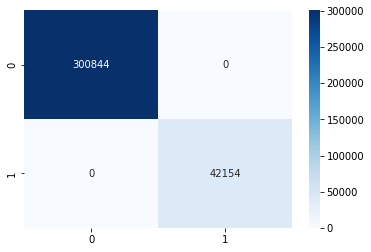

In [ ]:
cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: {}'.format(cm_train))

## visualisasi
sns.heatmap(cm_train, annot=True, fmt='', cmap="Blues")

In [ ]:
#Testing
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     33555
         1.0       0.27      0.29      0.28      4556

    accuracy                           0.82     38111
   macro avg       0.59      0.59      0.59     38111
weighted avg       0.83      0.82      0.82     38111



Confusion Matrix: [[29962  3237]
 [ 3593  1319]]


<AxesSubplot:>

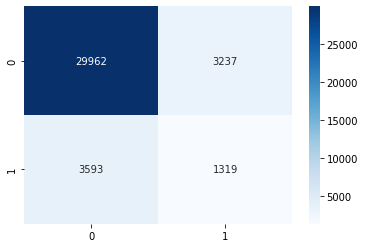

In [ ]:
cm_test = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_test))
## visualisasi
sns.heatmap(cm_test, annot=True, fmt='', cmap="Blues")